In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

import os
for dirname,_, filenames in os.walk('/kagle/input'):
  for filename in filenames:
    print(os.path.join(dirname,filename))

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/infy_stock.csv", usecols=['Date', 'Close'], parse_dates=['Date'], index_col='Date')
df.head()


Mounted at /content/drive


,Close
Date,
2015-01-01,1974.40
2015-01-02,2013.20
2015-01-05,1995.90
2015-01-06,1954.20
2015-01-07,1963.55


In [ ]:
df.shape


(248, 1)

In [ ]:
df.loc['2015-01-07',:]

Close    1963.55
Name: 2015-01-07 00:00:00, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2015-01-01 to 2015-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   248 non-null    float64
dtypes: float64(1)
memory usage: 12.0 KB


In [ ]:
print("Min:",df.index.min())
print("Max:",df.index.max())

Min: 2015-01-01 00:00:00
Max: 2015-12-31 00:00:00


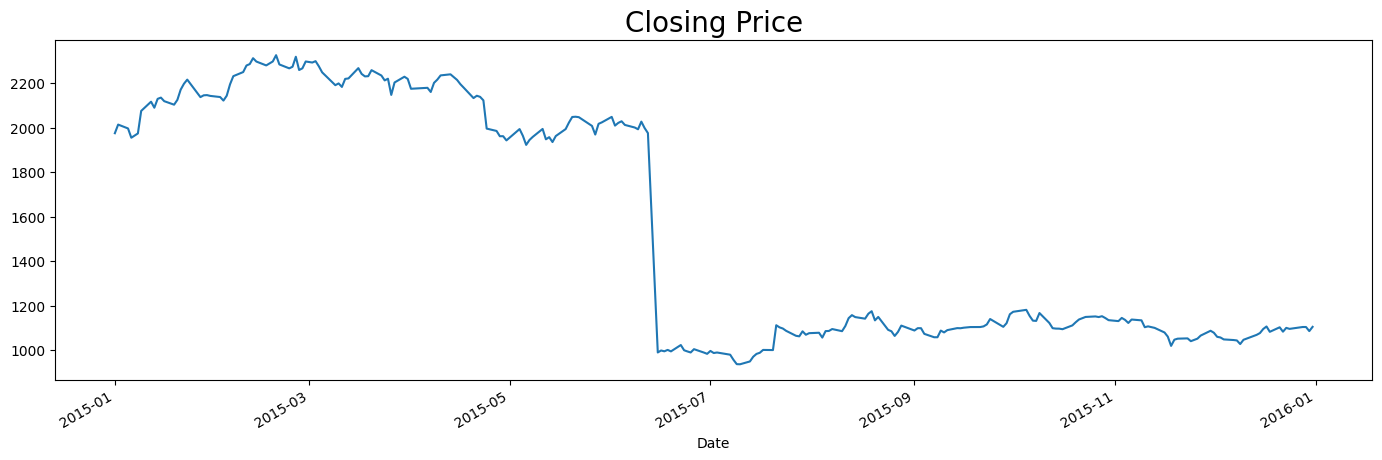

In [ ]:
plt.figure(figsize=(17,5))
df.Close.plot()
plt.title("Closing Price",fontsize=20)
plt.show()

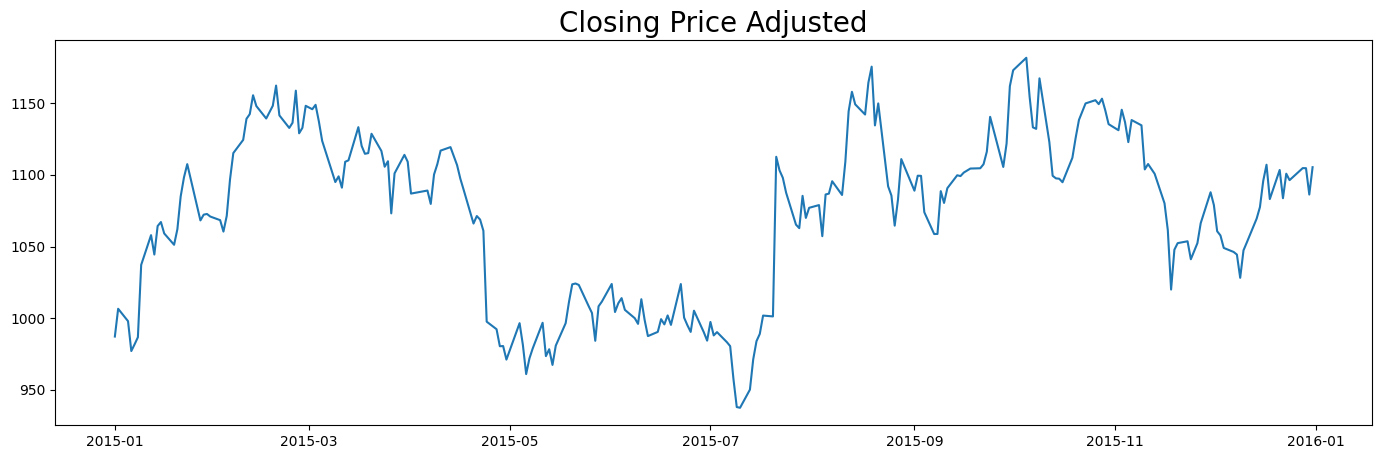

In [ ]:
plt.figure(figsize=(17,5))
stock_price = pd.concat([df.Close[:'2015-06-12']/2,df.Close['2015-06-15':]])
plt.plot(stock_price)
plt.title("Closing Price Adjusted",fontsize=20)
plt.show()

In [ ]:
prev_values = stock_price.iloc[:180]
y_test = stock_price.iloc[180:]

def plot_pred(pred,title):
    plt.figure(figsize=(17,5))
    plt.plot(prev_values,label='Train')
    plt.plot(y_test,label='Actual')
    plt.plot(pred,label='Predicted')
    plt.ylabel("Stock prices")
    plt.title(title,fontsize=20)
    plt.legend()
    plt.show()

In [ ]:
window_size = 10
y_av = y_test.rolling(window=window_size).mean().fillna(y_test.mean())
mse(y_av, y_test)


832.1163297606499

In [ ]:
np.sqrt(mse(y_av,y_test))

28.846426637638324

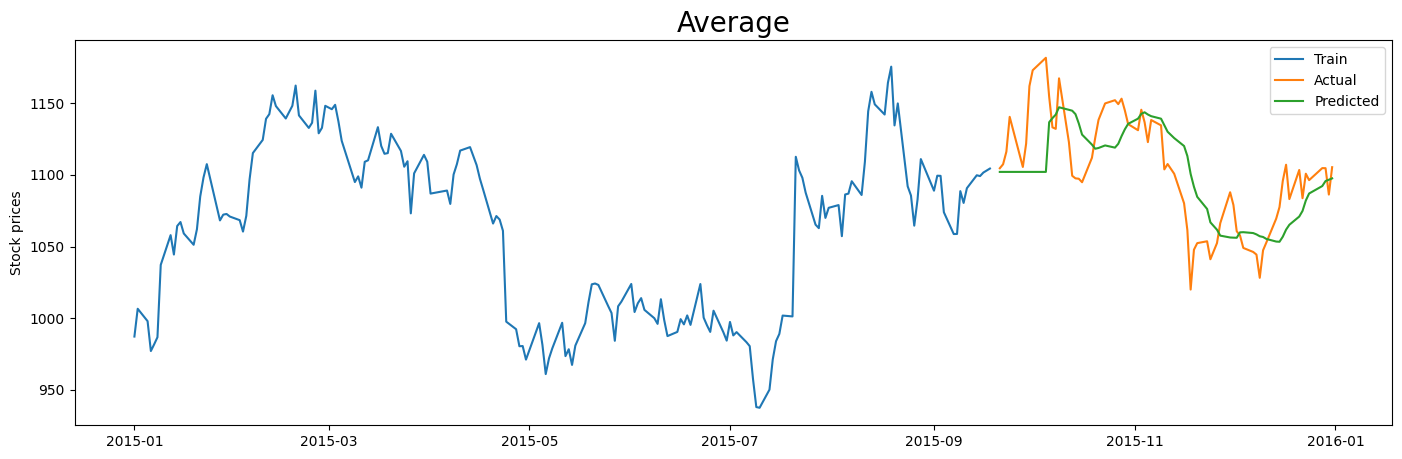

In [ ]:
plot_pred(y_av,"Average")

In [ ]:
weight = np.array(range(0,180))/180
weighted_train_data =np.multiply(prev_values,weight)
weighted_average = sum(weighted_train_data)/sum(weight)
y_wa = pd.Series(np.repeat(weighted_average,68),index=y_test.index)

print("MSE: " ,mse(y_wa,y_test))
print("RMSE: " ,np.sqrt(mse(y_wa,y_test)))

MSE:  3496.475652551586
RMSE:  59.1310041564625


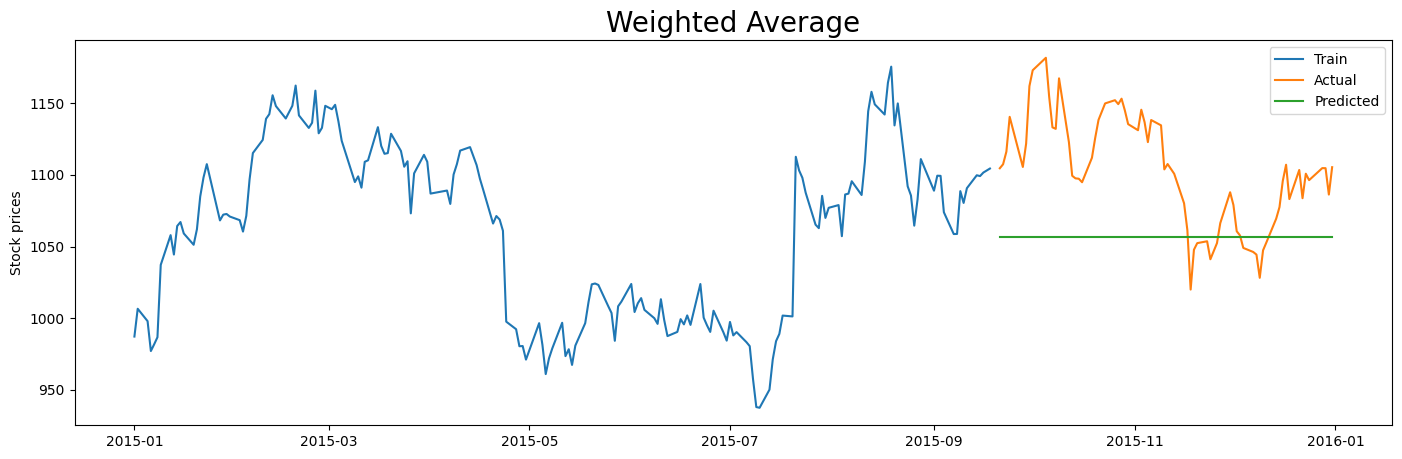

In [ ]:
plot_pred(y_wa,"Weighted Average")

In [ ]:
y_train = stock_price[80:180]
y_test = stock_price[180:]
print("y train:",y_train.shape,"\ny test:",y_test.shape)

y train: (100,) 
y test: (68,)


In [ ]:
X_train = pd.DataFrame([list(stock_price[i:i+80]) for i in range(100)],
                       columns=range(80,0,-1),index=y_train.index)
X_test = pd.DataFrame([list(stock_price[i:i+80]) for i in range(100,168)],
                       columns=range(80,0,-1),index=y_test.index)

X_train

,80,79,78,77,76,75,74,73,72,71,...,10,9,8,7,6,5,4,3,2,1
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-30,987.200,1006.600,997.950,977.100,981.775,986.725,1037.225,1057.975,1044.450,1064.325,...,1097.325,1089.625,1066.075,1071.300,1068.850,1061.000,997.600,992.325,980.450,980.575
2015-05-04,1006.600,997.950,977.100,981.775,986.725,1037.225,1057.975,1044.450,1064.325,1067.125,...,1089.625,1066.075,1071.300,1068.850,1061.000,997.600,992.325,980.450,980.575,971.125
2015-05-05,997.950,977.100,981.775,986.725,1037.225,1057.975,1044.450,1064.325,1067.125,1059.150,...,1066.075,1071.300,1068.850,1061.000,997.600,992.325,980.450,980.575,971.125,996.550
2015-05-06,977.100,981.775,986.725,1037.225,1057.975,1044.450,1064.325,1067.125,1059.150,1051.250,...,1071.300,1068.850,1061.000,997.600,992.325,980.450,980.575,971.125,996.550,981.375
2015-05-07,981.775,986.725,1037.225,1057.975,1044.450,1064.325,1067.125,1059.150,1051.250,1062.100,...,1068.850,1061.000,997.600,992.325,980.450,980.575,971.125,996.550,981.375,961.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-09-11,1023.225,1008.400,1003.650,984.250,1008.300,1011.575,1023.900,1004.325,1010.450,1014.025,...,1111.050,1094.400,1089.000,1099.450,1099.350,1073.950,1058.750,1058.800,1088.700,1080.450
2015-09-14,1008.400,1003.650,984.250,1008.300,1011.575,1023.900,1004.325,1010.450,1014.025,1005.825,...,1094.400,1089.000,1099.450,1099.350,1073.950,1058.750,1058.800,1088.700,1080.450,1090.750
2015-09-15,1003.650,984.250,1008.300,1011.575,1023.900,1004.325,1010.450,1014.025,1005.825,1000.025,...,1089.000,1099.450,1099.350,1073.950,1058.750,1058.800,1088.700,1080.450,1090.750,1099.750


In [ ]:
y_ma = X_test.mean(axis=1)
mse(y_ma,y_test), np.sqrt(mse(y_ma,y_test))

(2901.424183296478, 53.86486965821488)

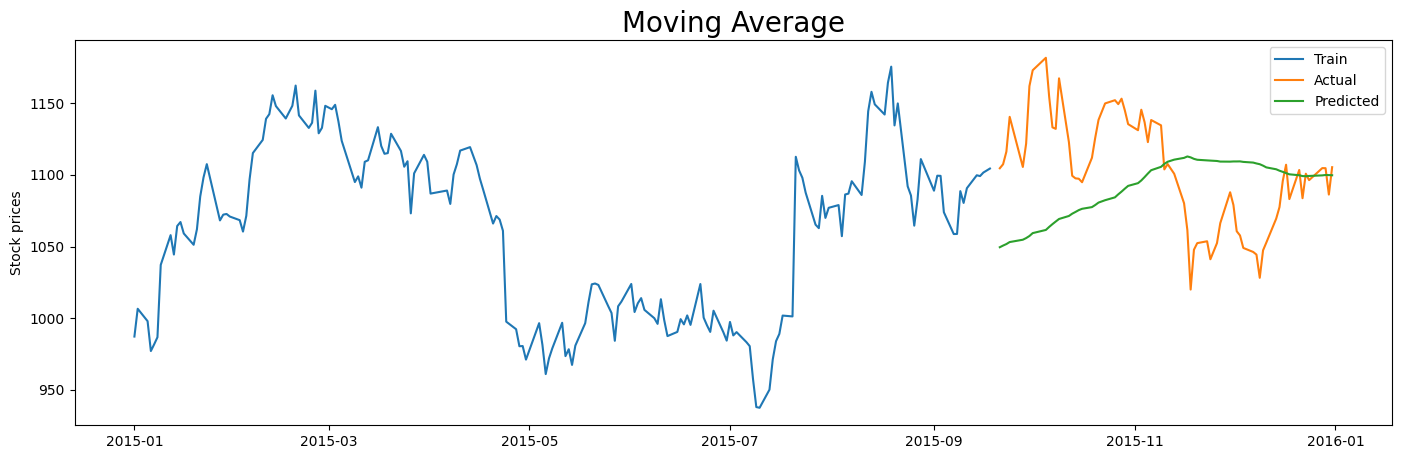

In [ ]:
plot_pred(y_ma,"Moving Average")

In [ ]:
weight = np.array(range(1,81))/80
y_wma = X_test@weight/sum(weight)
mse(y_wma,y_test),np.sqrt(mse(y_wma,y_test))

(1769.4332039308204, 42.064631270591455)

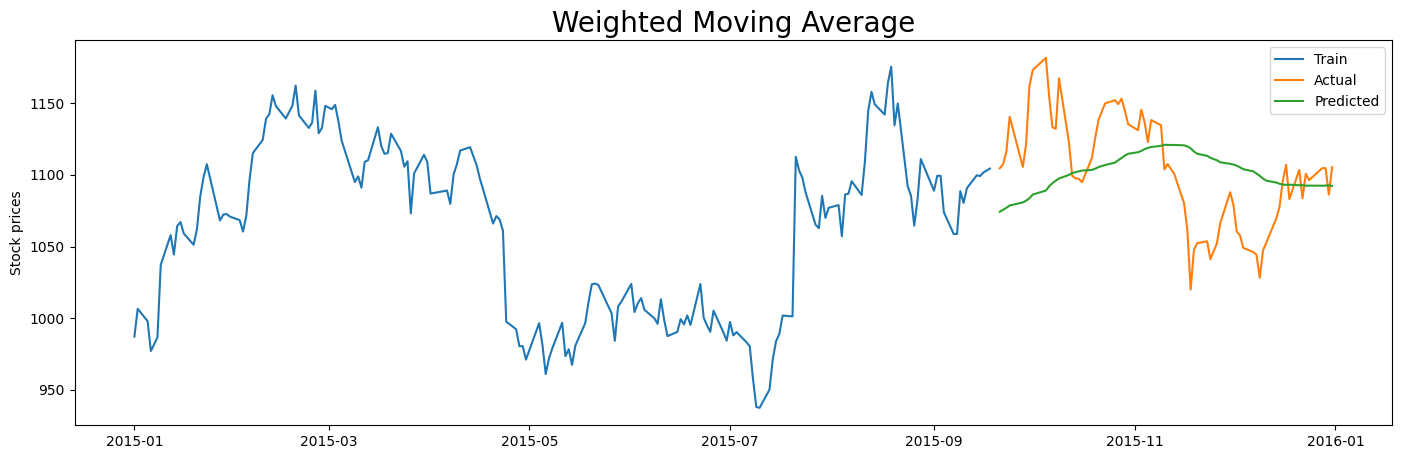

In [ ]:
plot_pred(y_wma,"Weighted Moving Average")

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(X_train,y_train)
y_lr = lr.predict(X_test)
y_lr = pd.Series(y_lr,index=y_test.index)

mse(y_test,y_lr), np.sqrt(mse(y_test,y_lr))

(1754.164541292568, 41.88274753753111)

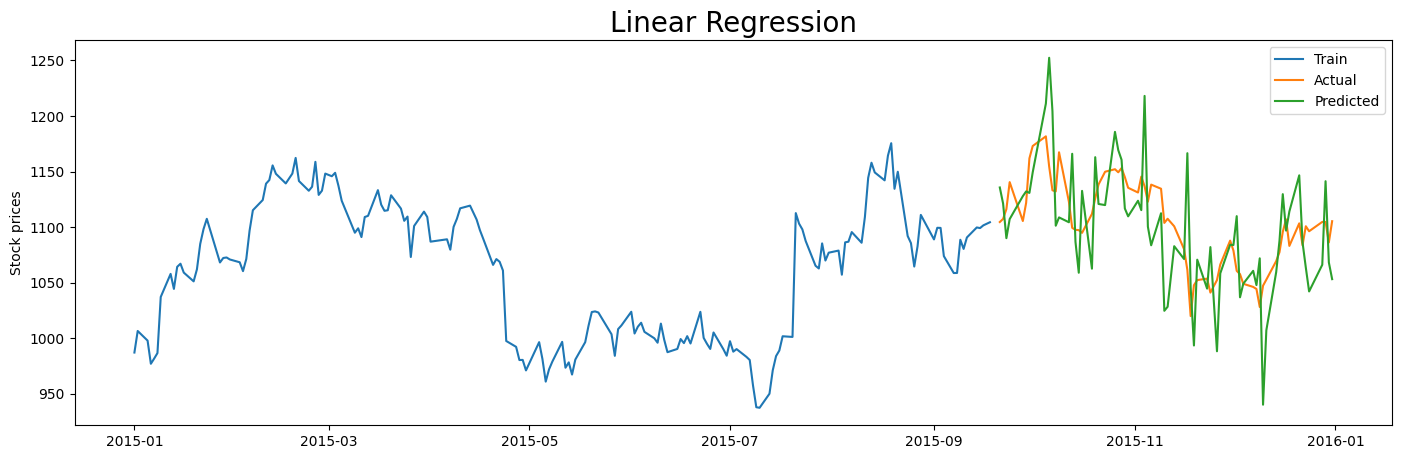

In [ ]:
plot_pred(y_lr,"Linear Regression")

In [ ]:
weight = np.array(range(1,101))/100
wlr = LinearRegression()

wlr.fit(X_train,y_train,weight)
y_wlr = wlr.predict(X_test)
y_wlr = pd.Series(y_wlr,index=y_test.index)

mse(y_test,y_wlr), np.sqrt(mse(y_test,y_wlr))

(2054.3614078787396, 45.325063793432655)

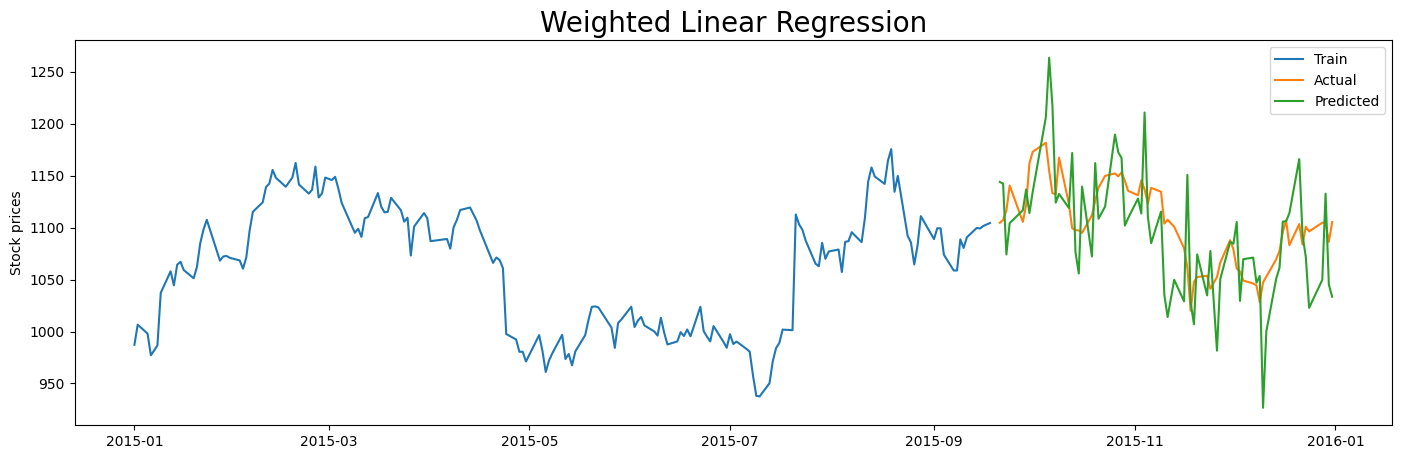

In [ ]:
plot_pred(y_wlr,"Weighted Linear Regression")

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()

las = lasso.fit(X_train,y_train)
y_las = las.predict(X_test)
y_las = pd.Series(y_las,index = y_test.index)

mse(y_las,y_test), np.sqrt(mse(y_test,y_wlr))

(1467.333864613377, 45.325063793432655)

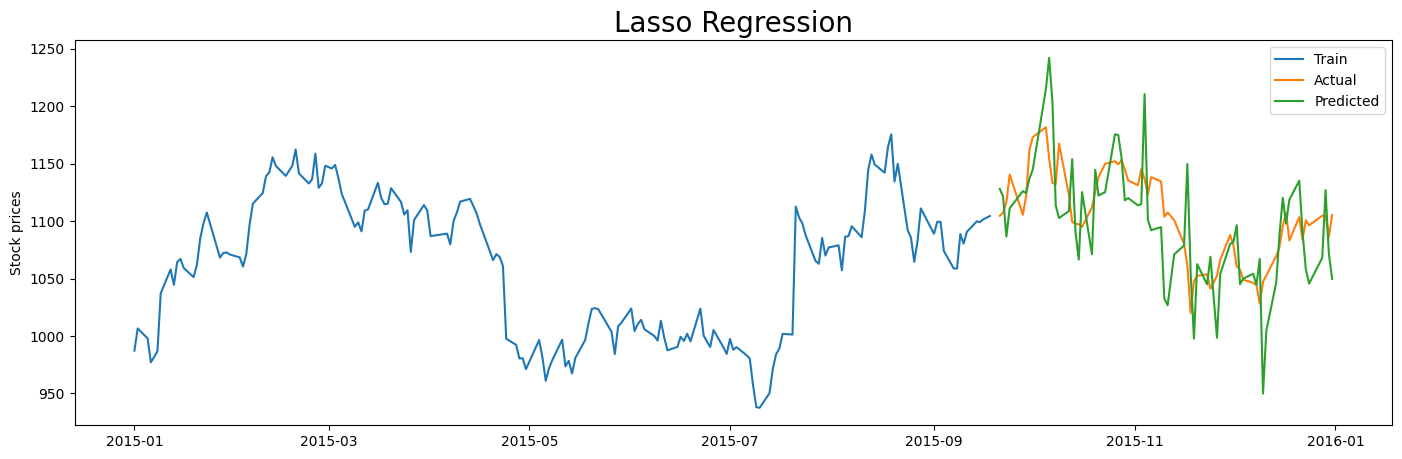

In [ ]:
plot_pred(y_las,"Lasso Regression")